In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.getcwd()
os.chdir('D:\Anupam_Technical\Code\ML\LearningProjects\Regression\data')
sales_df = pd.read_csv('kc_house_data.csv')
sales_df.sort_values(by=['sqft_living', 'price'], inplace=True)
sales_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


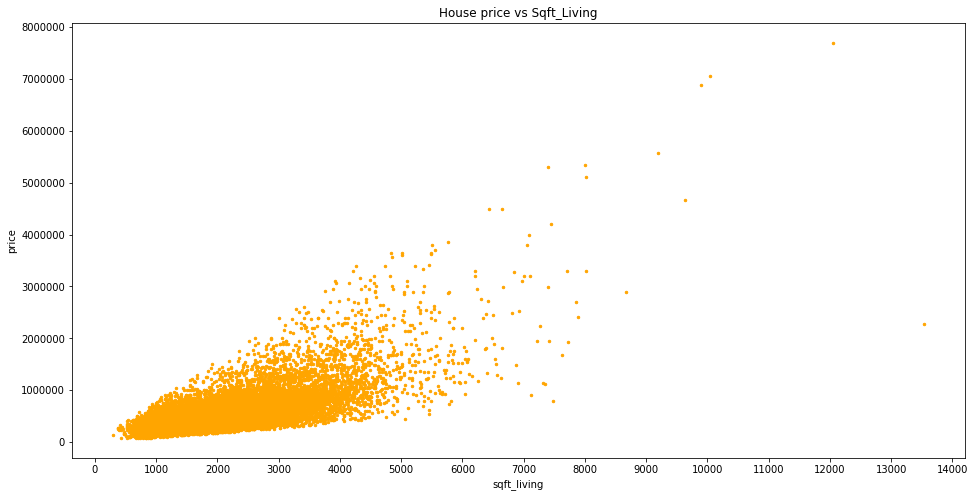

In [20]:
# The target variable that we want to predict is price and the input features that we consider is just sqft_living
sqft_living = sales_df.loc[:, 'sqft_living'].values.reshape(-1, 1)
price = sales_df.loc[:, 'price'].values.reshape(-1, 1)

# plot the house price versus sqft_living
def plot_sqftliving_price(sqft_living, price):
    fig, ax = plt.subplots(figsize=(16,8))    
    ax.scatter(sqft_living, price, s=6, color='orange')
    xrange = np.linspace(0, 14000, 15)
    ax.set_xticks(xrange)
    plt.xlabel('sqft_living')
    plt.ylabel('price')    

plot_sqftliving_price(sqft_living, price)
plt.title('House price vs Sqft_Living')
plt.show()

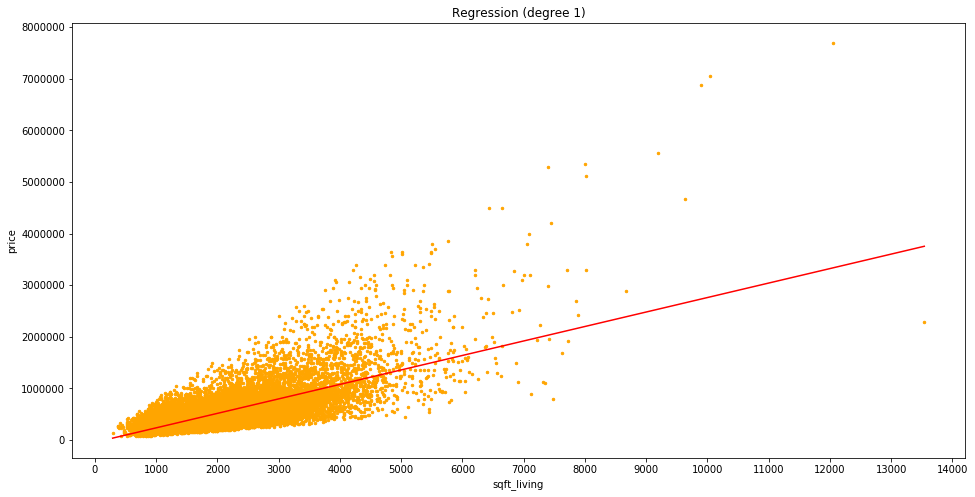

The root mean squared error = 261440.7903006718, r2_score = 0.492853217903793 for model complexity of polynomial degree 1


In [25]:
# fit a line ( polynomial of degree 1) to data using scikit learn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
sqft_living_prediction_samples = np.linspace(min(sqft_living), max(sqft_living))
reg.fit(sqft_living, price)
predicted_price_samples = reg.predict(sqft_living_prediction_samples)
predicted_price = reg.predict(sqft_living)

# plot the predicted price on top of the price vs sqft_living scatter plot
plot_sqftliving_price(sqft_living, price)
plt.plot(sqft_living_prediction_samples, predicted_price_samples, color='red')
plt.title('Regression (degree 1)')
plt.show()

# calculate the root mean squared error ( the difference between the predicted and actual price )
def print_model_statistics(degree, y, predicted_y):
    rmse_deg = np.sqrt(mean_squared_error(y, predicted_y))
    r2_deg = r2_score(y, predicted_y)
    print('The root mean squared error = {}, r2_score = {} for model complexity of polynomial degree {}'
          .format(rmse_deg, r2_deg, degree))

print_model_statistics(1, price, predicted_price)    

The root mean squared error = 261440.7903006718, r2_score = 0.492853217903793 for model complexity of polynomial degree 1
The root mean squared error = 250948.36761964747, r2_score = 0.5327430940591442 for model complexity of polynomial degree 2
The root mean squared error = 249261.28498622435, r2_score = 0.5390045510503199 for model complexity of polynomial degree 3
The root mean squared error = 248601.07526857711, r2_score = 0.5414433622736066 for model complexity of polynomial degree 4
The root mean squared error = 246562.86110062007, r2_score = 0.5489317065302622 for model complexity of polynomial degree 6


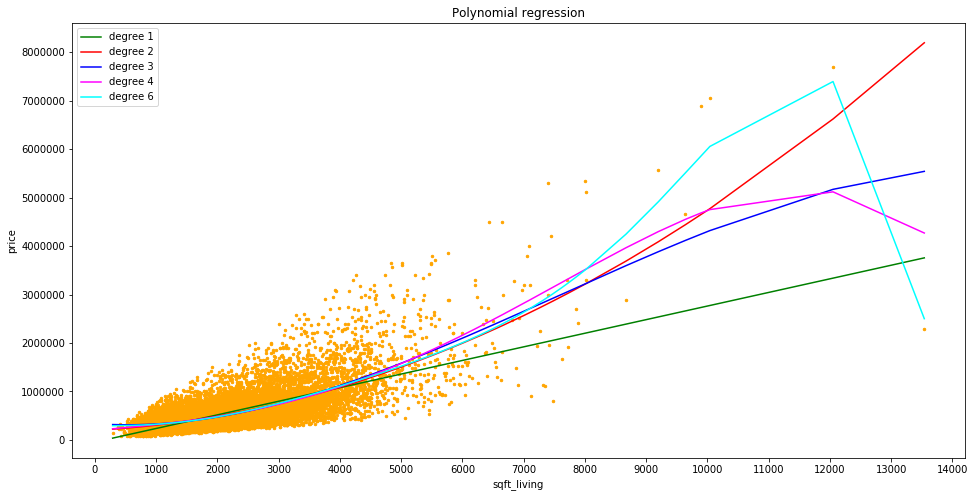

In [35]:
# Now increase the model complexity to fit a polynomial of degree 2 to the data
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial(degree_n, input_features):
    polynomial_features = PolynomialFeatures(degree=degree_n)
    input_features_degreen = polynomial_features.fit_transform(input_features)    
    polynomial_model = LinearRegression()
    return input_features_degreen, polynomial_model.fit(input_features_degreen, price)    

def regression_degree_n(degree_n, input_features, line_color):
    input_features_degree_n, polynomial_model_degn = fit_polynomial(degree_n, input_features)    
    predicted_price_degn = polynomial_model_degn.predict(input_features_degree_n)        
    plt.plot(sqft_living, predicted_price_degn, color=line_color, label='degree {}'.format(degree_n))            
    print_model_statistics(degree_n, price, predicted_price_degn)

# plot the predicted price on top of the price vs sqft_living scatter plot
plot_sqftliving_price(sqft_living, price)    
plt.plot(sqft_living_prediction_samples, predicted_price_samples, color='green', label='degree 1')
print_model_statistics(1, price, predicted_price)    
regression_degree_n(2, sqft_living, 'red')    
regression_degree_n(3, sqft_living, 'blue')    
regression_degree_n(4, sqft_living, 'magenta')    
regression_degree_n(6, sqft_living, 'cyan')    
plt.legend()
plt.title('Polynomial regression')    
plt.show()